<a href="https://colab.research.google.com/github/YeAybar/NYPD_Arrest_Project/blob/main/NYPD_Arrest_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [4]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.555070e+05,155478.000000,155404.000000,155507.000000,155507.000000,1.555070e+05,155507.000000,155507.000000,155507.000000
mean,2.304676e+08,407.828066,244.962974,62.850322,0.912486,1.004996e+06,208163.457555,40.737994,-73.925113
std,4.628028e+06,275.739138,150.334545,35.258605,7.894204,2.152869e+04,29904.384015,0.082086,0.077640
min,2.224711e+08,0.000000,101.000000,1.000000,0.000000,9.142140e+05,121312.000000,40.499401,-74.251844
25%,2.263289e+08,113.000000,111.000000,34.000000,0.000000,9.912230e+05,185908.000000,40.676902,-73.974837
50%,2.306202e+08,339.000000,235.000000,62.000000,0.000000,1.004222e+06,207067.000000,40.735036,-73.927979
75%,2.344524e+08,705.000000,344.000000,101.000000,0.000000,1.017119e+06,235804.000000,40.813903,-73.881512
max,2.385139e+08,997.000000,995.000000,123.000000,97.000000,1.066928e+06,271820.000000,40.912723,-73.701612


In [5]:
#validate is law code was a unique identifier
df['LAW_CODE'].is_unique

False

In [6]:
#validate the number of nulls per column
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         29
PD_DESC                      103
KY_CD                        103
OFNS_DESC                    103
LAW_CODE                       0
LAW_CAT_CD                  1393
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [7]:
#remove nulls 
df.dropna()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
5,234117071,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK,989013,192652,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155502,222884924,01/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
155503,223918625,02/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
155504,224323770,02/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
155505,222599533,01/04/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,73,0,25-44,M,BLACK,1007524,188555,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)


In [8]:
#drop columns not needed
df.drop(['PD_CD','KY_CD','LAW_CAT_CD','X_COORD_CD','Y_COORD_CD','Latitude', 'Longitude','New Georeferenced Column'], axis=1, inplace=True)

In [9]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,PL 1303501,Q,105,97,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,PL 1501500,K,69,71,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,PL 2631100,K,61,0,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,PL 1501001,B,42,71,18-24,M,BLACK
4,234188790,09/28/2021,NaN,NaN,PL 2223001,B,44,0,25-44,M,BLACK


In [10]:
#run a groupby to analize data by age group
byage = df.groupby(['AGE_GROUP'])['ARREST_KEY'].count()

In [11]:

byage.head()

AGE_GROUP
18-24    28951
25-44    88850
45-64    30608
65+       2298
<18       4800
Name: ARREST_KEY, dtype: int64

In [12]:
#run a groupby to analyze data by gender
bygender = df.groupby(['PERP_SEX'])['ARREST_KEY'].count()
bygender.head()

PERP_SEX
F     26597
M    128910
Name: ARREST_KEY, dtype: int64

In [13]:
#run a groupby to analyze data by race
byrace = df.groupby(['PERP_RACE'])['ARREST_KEY'].count()
byrace.head()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      443
ASIAN / PACIFIC ISLANDER           8593
BLACK                             77133
BLACK HISPANIC                    13576
UNKNOWN                             587
Name: ARREST_KEY, dtype: int64

In [14]:
#replace boro names from initial to full name
df['ARREST_BORO'] = df['ARREST_BORO'].replace(['B','K','M','Q','S'],['Bronx','Brooklyn','Manhattan', 'Queens', 'Staten Island'])
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,RAPE,PL 1303501,Queens,105,97,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",ARSON,PL 1501500,Brooklyn,69,71,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,SEX CRIMES,PL 2631100,Brooklyn,61,0,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",ARSON,PL 1501001,Bronx,42,71,18-24,M,BLACK
4,234188790,09/28/2021,NaN,NaN,PL 2223001,Bronx,44,0,25-44,M,BLACK


In [15]:
#run a groupby to analyze data by borough
byboro = df.groupby(['ARREST_BORO'])['ARREST_KEY'].count()
byboro.head()


ARREST_BORO
Bronx            34018
Brooklyn         41550
Manhattan        39677
Queens           33051
Staten Island     7211
Name: ARREST_KEY, dtype: int64

In [16]:
#run a groupby to analyze data by Offence
byofns = df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending= False)
byofns.head(50)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            26855
FELONY ASSAULT                          15579
PETIT LARCENY                           13178
DANGEROUS DRUGS                         10450
MISCELLANEOUS PENAL LAW                 10328
CRIMINAL MISCHIEF & RELATED OF           9294
ROBBERY                                  7848
DANGEROUS WEAPONS                        7206
GRAND LARCENY                            6671
VEHICLE AND TRAFFIC LAWS                 5264
BURGLARY                                 4895
OFFENSES AGAINST PUBLIC ADMINI           4682
OFFENSES INVOLVING FRAUD                 3832
SEX CRIMES                               3586
OFF. AGNST PUB ORD SENSBLTY &            3345
FORGERY                                  3127
INTOXICATED & IMPAIRED DRIVING           2334
POSSESSION OF STOLEN PROPERTY            1858
OTHER TRAFFIC INFRACTION                 1632
MURDER & NON-NEGL. MANSLAUGHTE           1513
FOR OTHER AUTHORITIES                    1393
OTHER OFFENSES RELATED T

In [17]:
#run a groupby to analyze data by Borough, Race, and Sex
bororacesex = df.groupby(['ARREST_BORO','PERP_RACE','PERP_SEX' ])['ARREST_KEY'].count()
bororacesex.head(60)

ARREST_BORO    PERP_RACE                       PERP_SEX
Bronx          AMERICAN INDIAN/ALASKAN NATIVE  F              12
                                               M              68
               ASIAN / PACIFIC ISLANDER        F              87
                                               M             415
               BLACK                           F            2974
                                               M           13454
               BLACK HISPANIC                  F             879
                                               M            4842
               UNKNOWN                         F              24
                                               M             106
               WHITE                           F             230
                                               M             905
               WHITE HISPANIC                  F            1925
                                               M            8097
Brooklyn       AMERICAN INDIAN/ALA

## **Which borough has the highest number of arrest?**

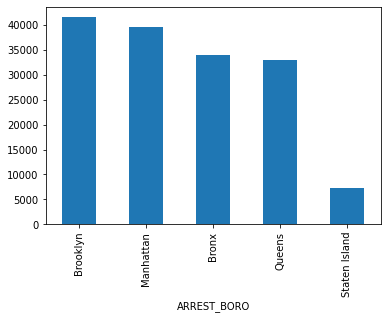

In [18]:
#create a visual by boro and number of arrest
byboro.sort_values(ascending=False).plot.bar()

After analyzing the chart above, Brooklyn is the borough with the highest arrest. Most people would think that the Bronx would have higher number of arrest. However, per the data even Manhattan has a higher number of arrest than the Bronx.

## **Which gender has a higher number of arrest?**

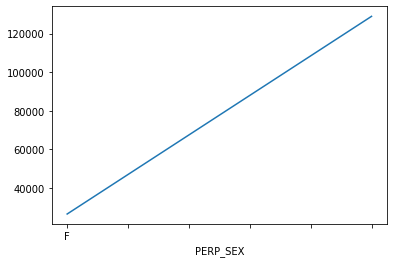

In [19]:
#Create a visual of comparison of arrests by race
bygender.plot.line()

When analyzing the chart above, it is clear that more males have been arrested than females.